<a href="https://colab.research.google.com/github/kyashhh/ETH-Price-Pridiction/blob/main/ETH_FBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of FBProphet**
Time series analysis

In [ ]:
#Import packages and libraries
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
#Initialize plotly
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
Uploading Dataset
from google.colab import files
files.upload()

Saving ETH-INR.csv to ETH-INR.csv


{'ETH-INR.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-11-11,19455.863281,20815.558594,19430.189453,20504.613281,20504.613281,54884332639\n2017-11-12,20505.201172,20796.009766,19451.107422,20063.285156,20063.285156,105134352629\n2017-11-13,20005.748047,21399.521484,20005.748047,20722.728516,20722.728516,68170861653\n2017-11-14,20725.802734,22287.546875,20725.802734,22081.068359,22081.068359,69957072000\n2017-11-15,22102.845703,22277.746094,21523.595703,21754.876953,21754.876953,47161182116\n2017-11-16,21760.490234,21957.906250,21105.582031,21606.029297,21606.029297,52052714705\n2017-11-17,21556.603516,21776.009766,21292.271484,21608.935547,21608.935547,40418861810\n2017-11-18,21582.021484,22728.535156,21302.933594,22598.255859,22598.255859,42233029830\n2017-11-19,22584.539063,24137.626953,22411.546875,23038.632813,23038.632813,76811264260\n2017-11-20,23019.650391,24224.257813,22967.318359,23872.291016,23872.291016,52533423086\n2017-11-21,23918.701172,24245.935547,22799.42773

In [ ]:
df=pd.read_csv('ETH-INR.csv')
#Getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1641 non-null   object 
 1   Open       1641 non-null   float64
 2   High       1641 non-null   float64
 3   Low        1641 non-null   float64
 4   Close      1641 non-null   float64
 5   Adj Close  1641 non-null   float64
 6   Volume     1641 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 89.9+ KB


In [ ]:
#Getting columns' names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Renaming columns
prophet_df = df.rename(columns={'Date':'ds',
                                'Close':'y'})

#Checking
prophet_df.columns

Index(['ds', 'Open', 'High', 'Low', 'y', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Initializing model
model = Prophet()

#Model fitting
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Forecast for the next 30 days
future = model.make_future_dataframe(periods=30)

#Prediction
forecast = model.predict(future)

In [ ]:
#Checking out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-11,42027.944037,32052.012799,89102.394040,42027.944037,42027.944037,19324.743831,19324.743831,19324.743831,-224.501923,-224.501923,-224.501923,19549.245753,19549.245753,19549.245753,0.0,0.0,0.0,61352.687868
1,2017-11-12,42108.943422,30980.907725,91944.090388,42108.943422,42108.943422,18786.295972,18786.295972,18786.295972,-140.885089,-140.885089,-140.885089,18927.181061,18927.181061,18927.181061,0.0,0.0,0.0,60895.239394
2,2017-11-13,42189.942808,28778.946083,90615.504835,42189.942808,42189.942808,18083.384827,18083.384827,18083.384827,-218.199937,-218.199937,-218.199937,18301.584764,18301.584764,18301.584764,0.0,0.0,0.0,60273.327635
3,2017-11-14,42270.942194,31179.629715,89030.838266,42270.942194,42270.942194,17955.274749,17955.274749,17955.274749,275.790674,275.790674,275.790674,17679.484075,17679.484075,17679.484075,0.0,0.0,0.0,60226.216943
4,2017-11-15,42351.941579,28789.210160,90901.350709,42351.941579,42351.941579,17680.812509,17680.812509,17680.812509,613.689971,613.689971,613.689971,17067.122538,17067.122538,17067.122538,0.0,0.0,0.0,60032.754088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,2022-06-04,265410.707359,229060.613399,288915.513266,265129.500698,265820.150581,-6341.024946,-6341.024946,-6341.024946,-224.501923,-224.501923,-224.501923,-6116.523023,-6116.523023,-6116.523023,0.0,0.0,0.0,259069.682414
1667,2022-06-05,265545.724915,228211.905406,289152.793597,265240.957558,266035.834613,-6918.766063,-6918.766063,-6918.766063,-140.885089,-140.885089,-140.885089,-6777.880974,-6777.880974,-6777.880974,0.0,0.0,0.0,258626.958852
1668,2022-06-06,265680.742471,230130.240733,289354.525235,265359.383898,266226.267298,-7581.782562,-7581.782562,-7581.782562,-218.199937,-218.199937,-218.199937,-7363.582625,-7363.582625,-7363.582625,0.0,0.0,0.0,258098.959909
1669,2022-06-07,265815.760028,226595.305540,289793.925013,265461.239344,266437.990331,-7599.507594,-7599.507594,-7599.507594,275.790674,275.790674,275.790674,-7875.298268,-7875.298268,-7875.298268,0.0,0.0,0.0,258216.252434


In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1671 non-null   datetime64[ns]
 1   trend                       1671 non-null   float64       
 2   yhat_lower                  1671 non-null   float64       
 3   yhat_upper                  1671 non-null   float64       
 4   trend_lower                 1671 non-null   float64       
 5   trend_upper                 1671 non-null   float64       
 6   additive_terms              1671 non-null   float64       
 7   additive_terms_lower        1671 non-null   float64       
 8   additive_terms_upper        1671 non-null   float64       
 9   weekly                      1671 non-null   float64       
 10  weekly_lower                1671 non-null   float64       
 11  weekly_upper                1671 non-null   float64     

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.0,1671.0,1671.0,1671.000000
mean,83011.771924,52346.564416,113507.844269,83010.138055,83014.406879,-100.556762,-100.556762,-100.556762,0.183060,0.183060,0.183060,-100.739822,-100.739822,-100.739822,0.0,0.0,0.0,82911.215162
std,93046.265734,93216.246409,93240.799253,93043.063020,93051.440206,10523.899824,10523.899824,10523.899824,312.053307,312.053307,312.053307,10519.635534,10519.635534,10519.635534,0.0,0.0,0.0,93198.133997
min,11884.389820,-37914.502900,21411.813437,11884.389820,11884.389820,-18103.192871,-18103.192871,-18103.192871,-331.213768,-331.213768,-331.213768,-17776.457223,-17776.457223,-17776.457223,0.0,0.0,0.0,-5984.648663
25%,13455.008766,-13897.441986,47343.201705,13455.008766,13455.008766,-9061.485650,-9061.485650,-9061.485650,-224.501923,-224.501923,-224.501923,-9073.451904,-9073.451904,-9073.451904,0.0,0.0,0.0,16474.323982
50%,30102.372994,2043.238644,63576.105263,30102.372994,30102.372994,254.317671,254.317671,254.317671,-140.885089,-140.885089,-140.885089,469.765334,469.765334,469.765334,0.0,0.0,0.0,32810.136818
75%,174760.653563,134070.148767,194339.891194,174760.653563,174760.653563,7326.424686,7326.424686,7326.424686,275.790674,275.790674,275.790674,7318.259492,7318.259492,7318.259492,0.0,0.0,0.0,163713.595819
max,265950.777584,245365.022145,305411.438628,265541.578158,266605.489232,24374.818264,24374.818264,24374.818264,613.689971,613.689971,613.689971,23767.906851,23767.906851,23767.906851,0.0,0.0,0.0,274129.867684


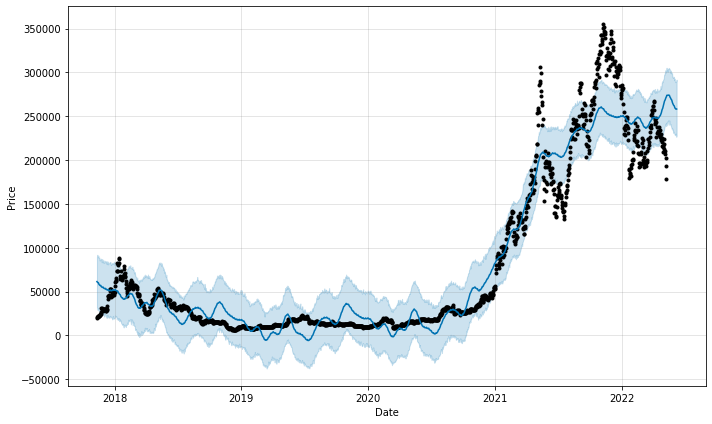

In [ ]:
#Visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

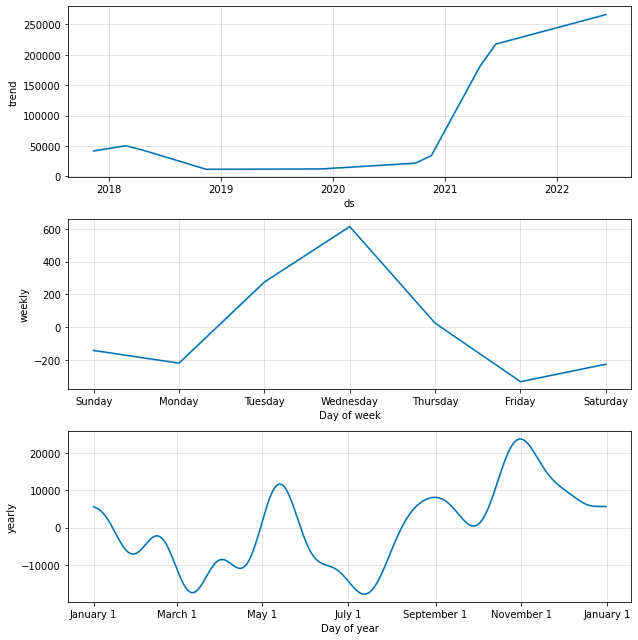

In [ ]:
#Visualize forecast
figure_2 = model.plot_components(forecast)